### 1- Importing Libraries

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 2- Loading Dataset

In [51]:
df = pd.read_csv("china_gdp.csv")
df.head(10)
df.tail(10)

,Year,Value
45,2005,2.268599e+12
46,2006,2.729784e+12
47,2007,3.523094e+12
48,2008,4.558431e+12
49,2009,5.059420e+12
50,2010,6.039659e+12
51,2011,7.492432e+12
52,2012,8.461623e+12
53,2013,9.490603e+12
54,2014,1.035483e+13


### 3- EDA (Exploratory Data Analysis)

In [52]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


### 4- Plotting the Dataset

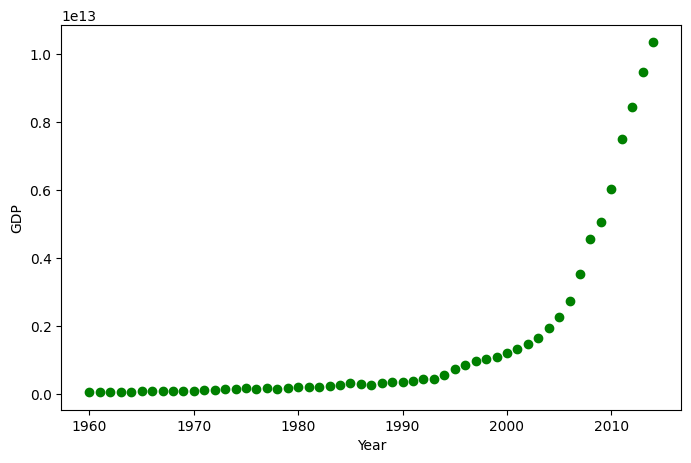

In [53]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)

plt.plot(x_data, y_data, 'go')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

#### Choosing Model (Logistic)

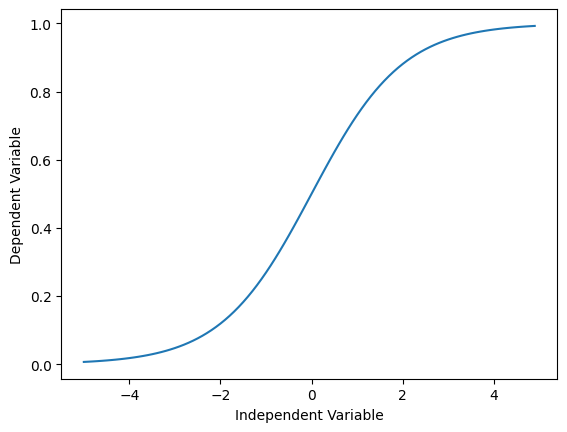

In [54]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### 5- Building The Model
- Logistic

In [55]:
def sigmoid(x, beta_1, beta_2):
    y = 1 / (1 + np.exp(-beta_1*(x-beta_2)))
    return y

#### Trying to Fit our Model

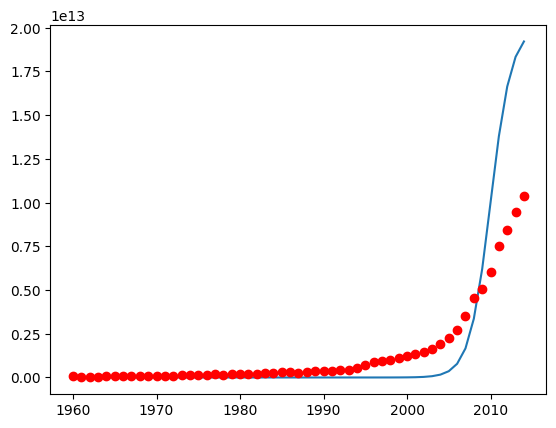

In [56]:
beta_1 = 0.80
beta_2 = 2010.0

# Logistic Function
Y_pred = sigmoid(x_data, beta_1, beta_2)

# Plot Initial Prediction
plt.plot(x_data, Y_pred * 20000000000000.)
plt.plot(x_data, y_data, 'ro')

### 6- Normalization

In [57]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

print("----- xdata -----")
print(xdata)
print("----- ydata -----")
print(ydata)

----- xdata -----
[0.97318769 0.97368421 0.97418073 0.97467726 0.97517378 0.97567031
 0.97616683 0.97666336 0.97715988 0.97765641 0.97815293 0.97864945
 0.97914598 0.9796425  0.98013903 0.98063555 0.98113208 0.9816286
 0.98212512 0.98262165 0.98311817 0.9836147  0.98411122 0.98460775
 0.98510427 0.98560079 0.98609732 0.98659384 0.98709037 0.98758689
 0.98808342 0.98857994 0.98907646 0.98957299 0.99006951 0.99056604
 0.99106256 0.99155909 0.99205561 0.99255214 0.99304866 0.99354518
 0.99404171 0.99453823 0.99503476 0.99553128 0.99602781 0.99652433
 0.99702085 0.99751738 0.9980139  0.99851043 0.99900695 0.99950348
 1.        ]
----- ydata -----
[0.0057156  0.00478589 0.00450854 0.00483806 0.00570384 0.00673204
 0.00732793 0.00695878 0.0067595  0.00760213 0.00883705 0.00951846
 0.01083164 0.01320831 0.01373801 0.01556399 0.01464318 0.01664431
 0.01432975 0.01707961 0.01831512 0.01877086 0.01965745 0.02211047
 0.02492384 0.02969431 0.02885665 0.02620514 0.03000746 0.03341025
 0.03466722 0.

### 7- Find The Best Parameters (optimization)

In [58]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

print("beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

beta_1 = 690.451712, beta_2 = 0.997207


### 8- Our Result Model

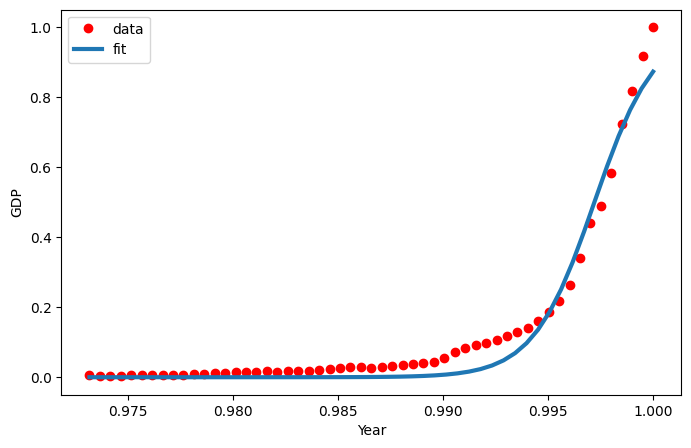

In [59]:
x = np.linspace(1960, 2014, 50)
x = x/max(x)
plt.figure(figsize=(8,5))

y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')

plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### 9- Checking The Accuracy

In [60]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ydata, Y_pred)
r2 = r2_score(ydata, Y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R2-Score: {r2:.2f}')

Mean Squared Error: 0.01
R2-Score: 0.86
